In [34]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

# Load the Dataset
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')

print("Training Data Sample:")
train_df.head()

Training Data Sample:


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
print("Testing Data Sample:")
test_df.head()

Testing Data Sample:


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
train_df.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    66292 non-null  int64 
 1   SentenceId  66292 non-null  int64 
 2   Phrase      66291 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
train_df.describe(include='all')

,PhraseId,SentenceId,Phrase,Sentiment
count,156060.000000,156060.000000,156060,156060.000000
unique,NaN,NaN,156060,NaN
top,NaN,NaN,A series of escapades demonstrating the adage ...,NaN
freq,NaN,NaN,1,NaN
mean,78030.500000,4079.732744,NaN,2.063578
std,45050.785842,2502.764394,NaN,0.893832
min,1.000000,1.000000,NaN,0.000000
25%,39015.750000,1861.750000,NaN,2.000000
50%,78030.500000,4017.000000,NaN,2.000000
75%,117045.250000,6244.000000,NaN,3.000000


In [ ]:
test_df.describe(include='all')

,PhraseId,SentenceId,Phrase
count,66292.00000,66292.000000,66291
unique,NaN,NaN,66291
top,NaN,NaN,An intermittently pleasing but mostly routine ...
freq,NaN,NaN,1
mean,189206.50000,10114.909144,NaN
std,19136.99636,966.787807,NaN
min,156061.00000,8545.000000,NaN
25%,172633.75000,9266.000000,NaN
50%,189206.50000,10086.000000,NaN
75%,205779.25000,10941.000000,NaN


In [ ]:
train_df.shape

(156060, 4)

In [ ]:
test_df.shape

(66292, 3)

In [ ]:
train_df.isna().sum()

,0
PhraseId,0
SentenceId,0
Phrase,0
Sentiment,0


In [ ]:
test_df.isna().sum()

,0
PhraseId,0
SentenceId,0
Phrase,1


In [35]:
test_df=test_df.dropna()

In [ ]:
test_df.isna().sum()

,0
PhraseId,0
SentenceId,0
Phrase,0


In [ ]:
train_df.duplicated().sum()

0

In [ ]:
test_df.duplicated().sum()

0

In [ ]:
train_df['Phrase'].value_counts().sum()

156060

In [ ]:
test_df['Phrase'].value_counts().sum()

66291

In [ ]:
# Function to count words
def count_words(phrase):
    return len(phrase.split())

word_counts = train_df['Phrase'].apply(count_words)
print(word_counts)

0         37
1         14
2          2
3          1
4          1
          ..
156055     2
156056     3
156057     2
156058     1
156059     1
Name: Phrase, Length: 156060, dtype: int64


In [ ]:
train_df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [ ]:
for i in range(10):
     print(train_df['Phrase'][i])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
A series of escapades demonstrating the adage that what is good for the goose
A series
A
series
of escapades demonstrating the adage that what is good for the goose
of
escapades demonstrating the adage that what is good for the goose
escapades
demonstrating the adage that what is good for the goose


In [ ]:
for i in range(10):
     print(test_df['Phrase'][i])

An intermittently pleasing but mostly routine effort .
An intermittently pleasing but mostly routine effort
An
intermittently pleasing but mostly routine effort
intermittently pleasing but mostly routine
intermittently pleasing but
intermittently pleasing
intermittently
pleasing
but


<Axes: xlabel='Sentiment', ylabel='count'>

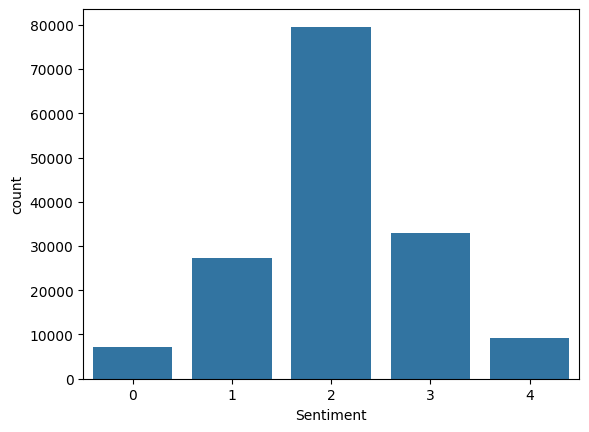

In [ ]:
sns.countplot(data=train_df,x='Sentiment')

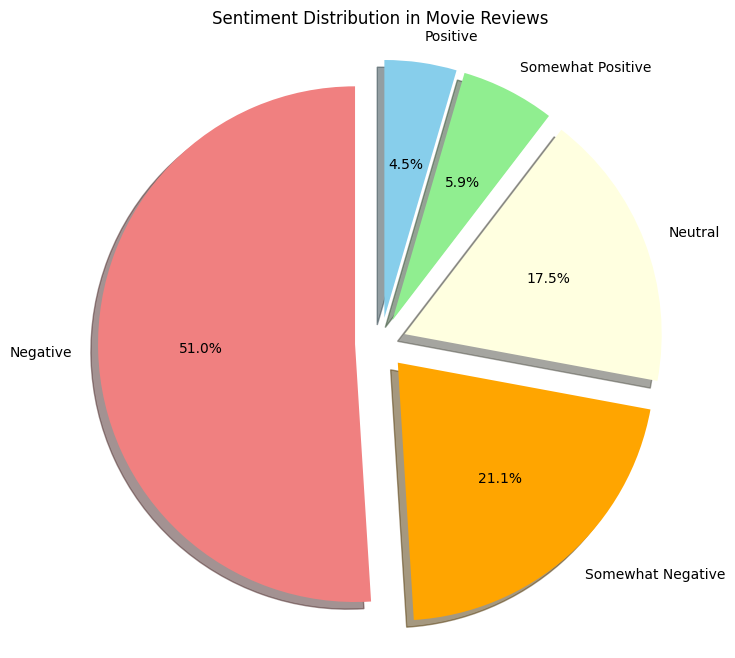

In [ ]:
plt.figure(figsize=(8, 8))
sentiment_counts = train_df['Sentiment'].value_counts()
labels = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']
colors = ["lightcoral", "orange", "lightyellow", "lightgreen", "skyblue"]
explode = [0.1] * len(labels)

plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=colors, startangle=90, explode=explode)
plt.axis('equal')
plt.title('Sentiment Distribution in Movie Reviews')
plt.show()

In [36]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure the necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    """
    Preprocess the input text by tokenizing, lowercasing,
    removing punctuation, filtering out stop words, and applying lemmatization.

    Args:
        text (str): The text to preprocess.

    Returns:
        str: The cleaned and processed text.
    """

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


train_df['Phrase']=train_df['Phrase'].apply(preprocess_text)
test_df['Phrase']=test_df['Phrase'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
for i in range(10):
    print(train_df['Phrase'][i])

series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story
series escapade demonstrating adage good goose
series

series
escapade demonstrating adage good goose

escapade demonstrating adage good goose
escapade
demonstrating adage good goose


In [38]:
for i in range(10):
    print(test_df['Phrase'][i])

intermittently pleasing mostly routine effort
intermittently pleasing mostly routine effort

intermittently pleasing mostly routine effort
intermittently pleasing mostly routine
intermittently pleasing
intermittently pleasing
intermittently
pleasing



there was a blank space left after preprocessing the text, so drop that blank space row to more clean the data

In [ ]:
train_df[train_df['Phrase'] == '']

,PhraseId,SentenceId,Phrase,Sentiment
3,4,1,,2
6,7,1,,2
13,14,1,,2
16,17,1,,2
18,19,1,,2
...,...,...,...,...
153907,153908,8409,,2
154523,154524,8446,,2
154524,154525,8446,,2
154867,154868,8471,,1


In [ ]:
test_df[test_df['Phrase'] == '']

,PhraseId,SentenceId,Phrase
2,156063,8545,
9,156070,8545,
14,156075,8545,
20,156081,8546,
24,156085,8546,
...,...,...,...
66085,222146,11842,
66086,222147,11842,
66087,222148,11842,
66088,222149,11842,


In [39]:
train_df = train_df[train_df['Phrase'] != '']

In [40]:
test_df = test_df[test_df['Phrase'] != '']

In [ ]:
train_df.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapade demonstrating adage good goose...,1
1,2,1,series escapade demonstrating adage good goose,2
2,3,1,series,2
4,5,1,series,2
5,6,1,escapade demonstrating adage good goose,2
7,8,1,escapade demonstrating adage good goose,2
8,9,1,escapade,2
9,10,1,demonstrating adage good goose,2
10,11,1,demonstrating adage,2
11,12,1,demonstrating,2


In [ ]:
test_df.head(10)

,PhraseId,SentenceId,Phrase
0,156061,8545,intermittently pleasing mostly routine effort
1,156062,8545,intermittently pleasing mostly routine effort
3,156064,8545,intermittently pleasing mostly routine effort
4,156065,8545,intermittently pleasing mostly routine
5,156066,8545,intermittently pleasing
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
10,156071,8545,mostly routine
11,156072,8545,mostly


In [41]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['Phrase'])
y_train = train_df['Sentiment']

In [42]:
# Transform the test data using the same TF-IDF vectorizer
X_test_tfidf = vectorizer.transform(test_df['Phrase'])

In [43]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [44]:
# Make predictions with Naive Bayes
nb_predictions = nb_model.predict(X_test_tfidf)

In [45]:
# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [46]:
# Make predictions with Logistic Regression
log_reg_predictions = log_reg_model.predict(X_test_tfidf)

In [47]:
# Add predictions to the test DataFrame
test_df['Log_Reg_Prediction'] = log_reg_predictions
test_df['NB_Prediction'] = nb_predictions

In [49]:
# Display predictions
print("Predictions on Test Data:")
test_df[['PhraseId', 'Phrase', 'Log_Reg_Prediction', 'NB_Prediction']]

Predictions on Test Data:


,PhraseId,Phrase,Log_Reg_Prediction,NB_Prediction
0,156061,intermittently pleasing mostly routine effort,3,3
1,156062,intermittently pleasing mostly routine effort,3,3
3,156064,intermittently pleasing mostly routine effort,3,3
4,156065,intermittently pleasing mostly routine,3,3
5,156066,intermittently pleasing,3,3
...,...,...,...,...
66287,222348,long-winded predictable scenario,1,2
66288,222349,long-winded predictable scenario,1,2
66289,222350,long-winded,2,2
66290,222351,long-winded,2,2


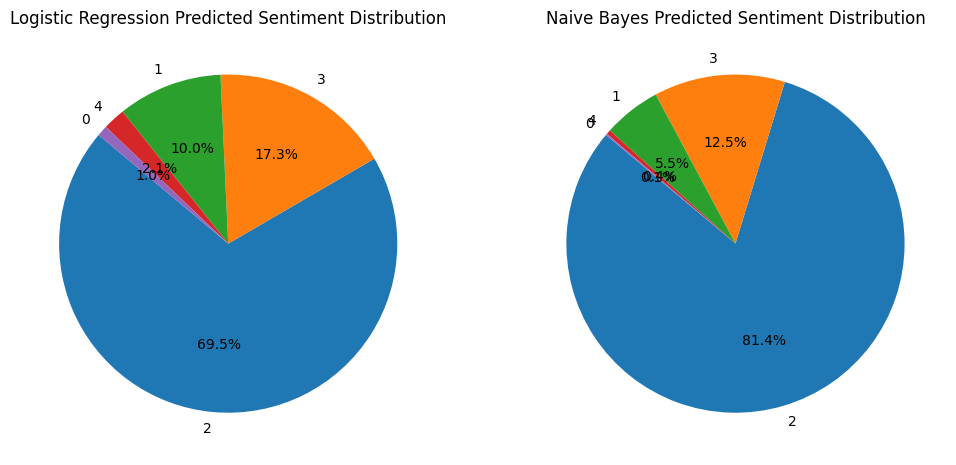

In [ ]:
# Visualize the distribution of predictions
plt.figure(figsize=(12, 6))

# Logistic Regression Prediction Distribution
plt.subplot(1, 2, 1)
log_reg_counts = pd.Series(log_reg_predictions).value_counts()
plt.pie(log_reg_counts, labels=log_reg_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Logistic Regression Predicted Sentiment Distribution')

# Naive Bayes Prediction Distribution
plt.subplot(1, 2, 2)
nb_counts = pd.Series(nb_predictions).value_counts()
plt.pie(nb_counts, labels=nb_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Naive Bayes Predicted Sentiment Distribution')

plt.show()